# NM $\sigma$ Estimation Algorithms Comparison: Empirical vs Eigenvalue Based method

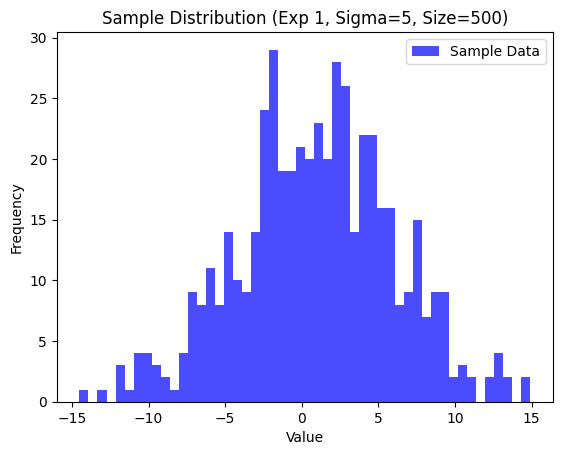

Experiment 1:
  True Sigma: 5
  Estimated Sigma (Method 1): 5.625625625625625
  Estimated Sigma (Method 2): 6.371329272859051
  Absolute Error (Method 1): 0.6256256256256254
  Absolute Error (Method 2): 1.3713292728590512
  Relative Error (Method 1): 12.51%
  Relative Error (Method 2): 27.43%
  Squared Error (Method 1): 0.39140742343945517
  Squared Error (Method 2): 1.880543974600134
------------------------------


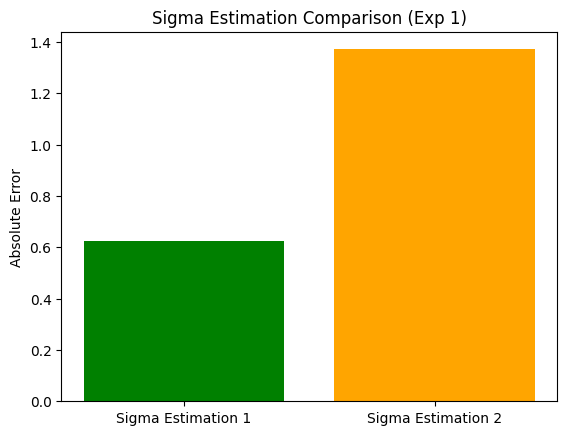

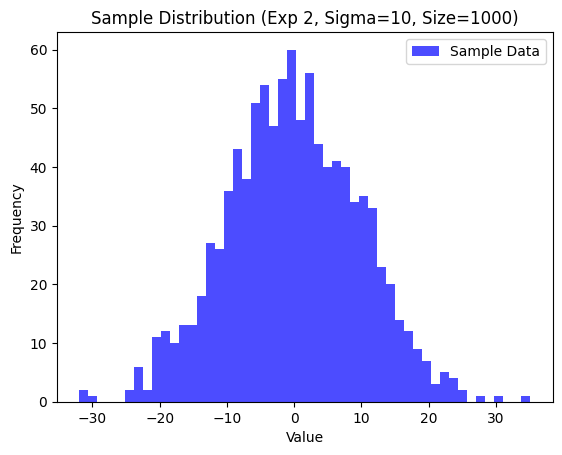

Experiment 2:
  True Sigma: 10
  Estimated Sigma (Method 1): 10.11011011011011
  Estimated Sigma (Method 2): 9.542732560586753
  Absolute Error (Method 1): 0.11011011011011007
  Absolute Error (Method 2): 0.457267439413247
  Relative Error (Method 1): 1.10%
  Relative Error (Method 2): 4.57%
  Squared Error (Method 1): 0.012124236348460564
  Squared Error (Method 2): 0.2090935111475475
------------------------------


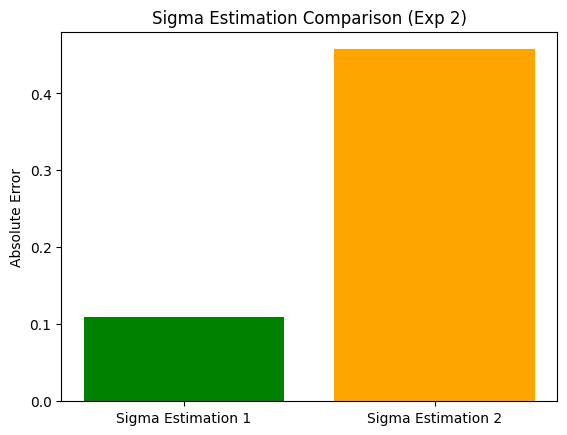

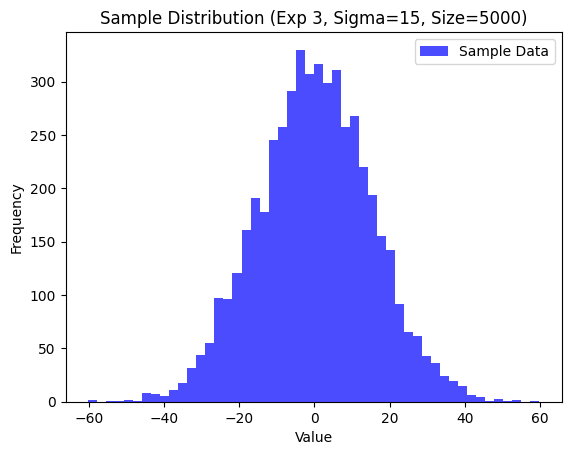

Experiment 3:
  True Sigma: 15
  Estimated Sigma (Method 1): 15.415415415415417
  Estimated Sigma (Method 2): 15.265384750858434
  Absolute Error (Method 1): 0.41541541541541704
  Absolute Error (Method 2): 0.26538475085843416
  Relative Error (Method 1): 2.77%
  Relative Error (Method 2): 1.77%
  Squared Error (Method 1): 0.17256996736476352
  Squared Error (Method 2): 0.07042906598819317
------------------------------


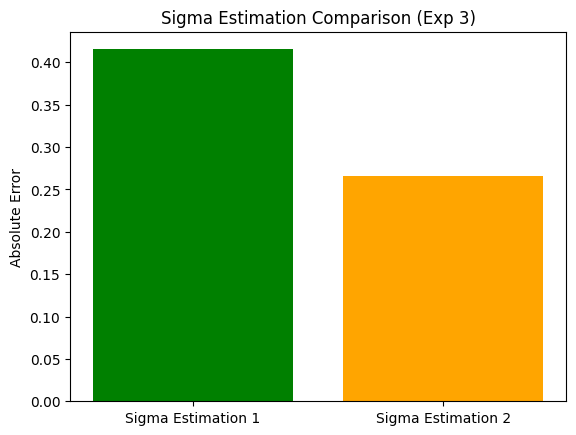

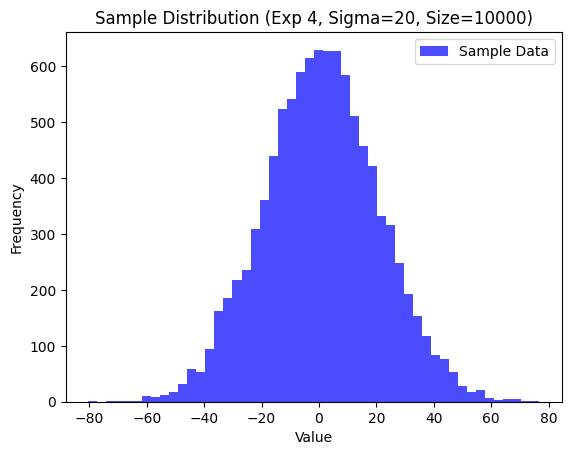

Experiment 4:
  True Sigma: 20
  Estimated Sigma (Method 1): 20.37037037037037
  Estimated Sigma (Method 2): 20.885198449010726
  Absolute Error (Method 1): 0.37037037037037024
  Absolute Error (Method 2): 0.8851984490107263
  Relative Error (Method 1): 1.85%
  Relative Error (Method 2): 4.43%
  Squared Error (Method 1): 0.13717421124828522
  Squared Error (Method 2): 0.7835762941309954
------------------------------


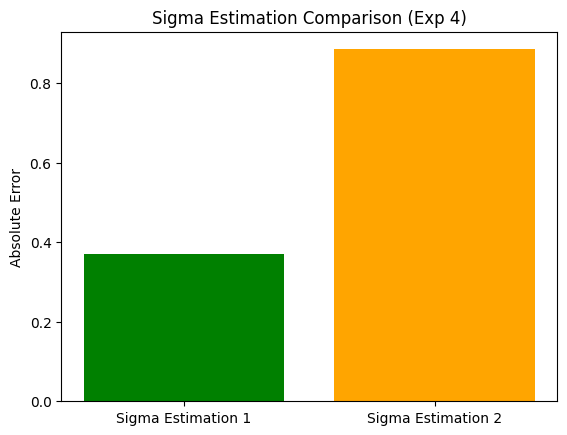

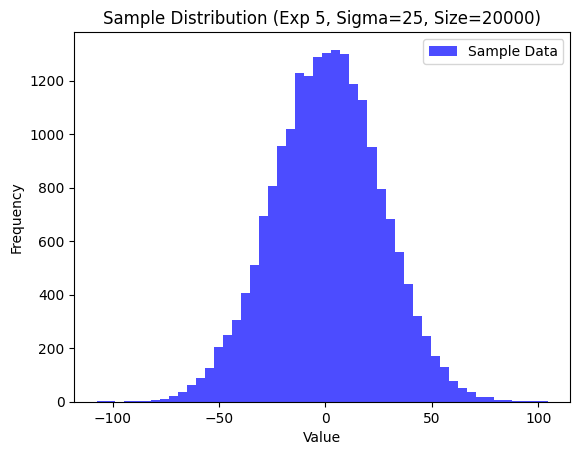

Experiment 5:
  True Sigma: 25
  Estimated Sigma (Method 1): 25.585585585585584
  Estimated Sigma (Method 2): 25.707003484225922
  Absolute Error (Method 1): 0.5855855855855836
  Absolute Error (Method 2): 0.7070034842259219
  Relative Error (Method 1): 2.34%
  Relative Error (Method 2): 2.83%
  Squared Error (Method 1): 0.34291047804561087
  Squared Error (Method 2): 0.4998539267075933
------------------------------


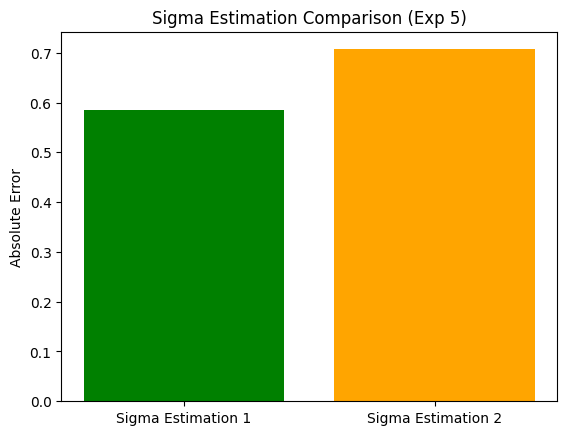

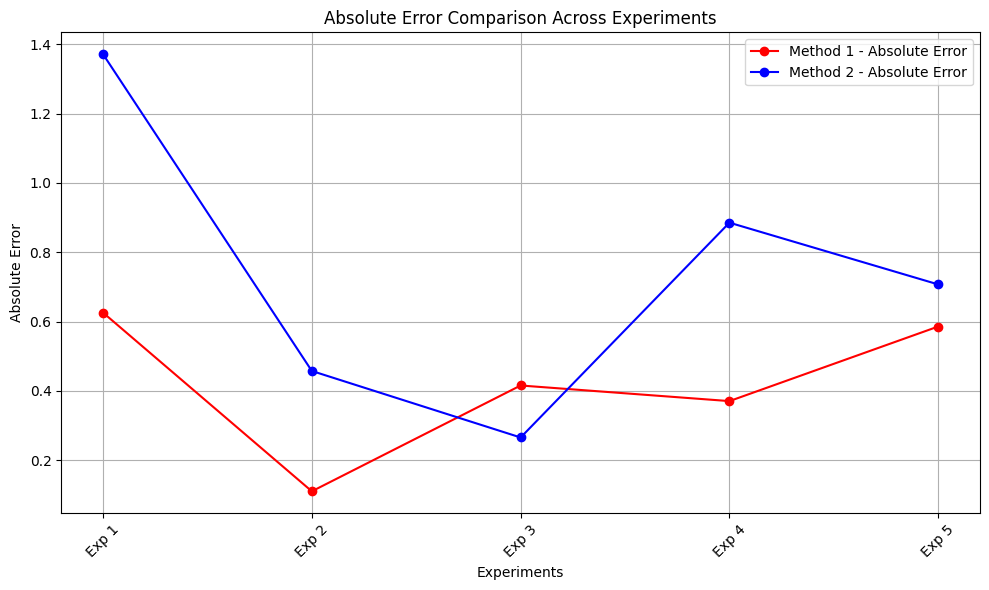

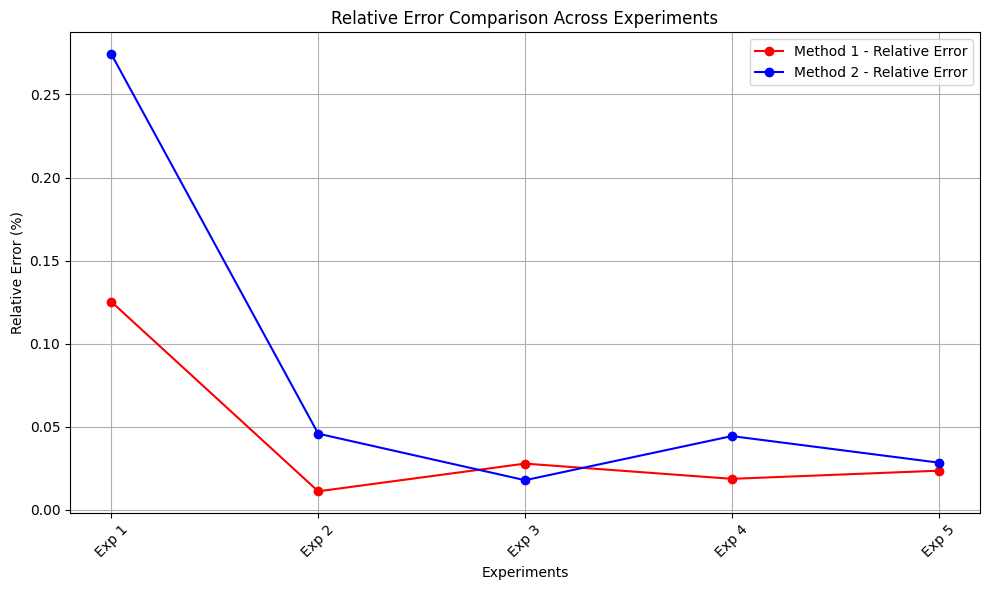

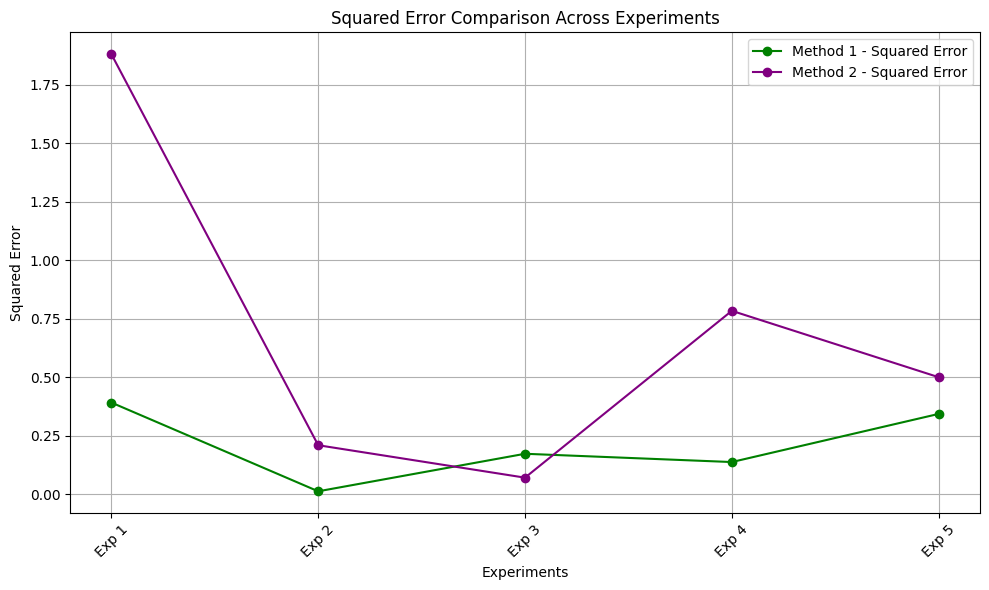

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, norm
from src.estimators.semiparametric.nm_semiparametric_estimator import NMSemiParametricEstimator
from src.generators.nm_generator import NMGenerator
from src.mixtures.nm_mixture import NormalMeanMixtures

def generate_mixture_samples(real_sigma, sample_len, distribution):
    """Generate samples using the NMGenerator and given parameters.

    Args:
        real_sigma (float): True sigma value.
        sample_len (int): Sample size.
        distribution: Distribution to use (e.g., expon, uniform, norm).

    Returns:
        np.ndarray: Generated sample.
    """
    generator = NMGenerator()
    mixture = NormalMeanMixtures("canonical", sigma=real_sigma, distribution=distribution)
    return generator.generate(mixture, sample_len)

def estimate_sigma_eigenvalue_based(sample, real_sigma, search_area, a, b):
    sample_len = len(sample)
    k = sample_len ** (1 / 2 - a - b)
    l = 1 / search_area * math.sqrt((a * math.log(sample_len)) / 2) * k
    eps = (
        math.sqrt(2 * a)
        / search_area
        * math.sqrt(math.log(sample_len))
        / sample_len**b
        * (np.log(np.log(sample_len))) ** 0.6
    )

    estimator = NMSemiParametricEstimator(
        "sigma_estimation_eigenvalue_based", {"k": k, "l": l, "eps": eps, "search_area": search_area}
    )
    est = estimator.estimate(sample)
    absolute_error = abs(est.value - real_sigma)
    relative_error = absolute_error / real_sigma
    squared_error = absolute_error**2
    return est.value, absolute_error, relative_error, squared_error

def estimate_sigma_empirical(sample, real_sigma, search_area, sample_len):
    best_estimate = None
    answer_list = []

    # Iterate over alpha values
    for alpha in [round(x, 5) for x in [i * 0.0001 for i in range(1, 10000)]]:
        t = math.sqrt(alpha * math.log(sample_len)) / (2 * search_area)
        estimator = NMSemiParametricEstimator("sigma_estimation_empirical", {"t": t})
        est = estimator.estimate(sample)
        
        left = (est.value**2 - real_sigma**2) ** 0.5
        right = (
            8
            * search_area**2
            / (alpha * math.log(sample_len) * sample_len ** ((1 - alpha) / 2) + 2 * math.exp(-1 * t))
        )

        if left.real < right.real:
            answer_list.append(est.value)

    if answer_list:
        best_estimate = min(answer_list, key=lambda x: abs(x - real_sigma))
        absolute_error = abs(best_estimate - real_sigma)
        relative_error = absolute_error / real_sigma
        squared_error = absolute_error**2
        return best_estimate, absolute_error, relative_error, squared_error

    return None, None, None, None

def visualize_samples(sample, title):
    """Visualize the generated sample.

    Args:
        sample (np.ndarray): Sample data to visualize.
        title (str): Title for the plot.
    """
    plt.hist(sample, bins=50, alpha=0.7, color="blue", label="Sample Data")
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    experiments = [
        {"real_sigma": 5, "sample_len": 500, "search_area": 10.0, "a": 1 / 16, "b": 1 / 8, "distribution": expon},
        {"real_sigma": 10, "sample_len": 1000, "search_area": 20.0, "a": 1 / 16, "b": 1 / 8, "distribution": uniform},
        {"real_sigma": 15, "sample_len": 5000, "search_area": 25.0, "a": 1 / 16, "b": 1 / 8, "distribution": norm},
        {"real_sigma": 20, "sample_len": 10000, "search_area": 25.0, "a": 1 / 16, "b": 1 / 8, "distribution": expon},
        {"real_sigma": 25, "sample_len": 20000, "search_area": 30.0, "a": 1 / 16, "b": 1 / 8, "distribution": uniform},
    ]

    # Initialize lists to store results
    absolute_errors_1 = []
    relative_errors_1 = []
    squared_errors_1 = []
    absolute_errors_2 = []
    relative_errors_2 = []
    squared_errors_2 = []

    for i, exp in enumerate(experiments):
        sample = generate_mixture_samples(
            exp["real_sigma"], exp["sample_len"], exp["distribution"]
        )

        title = f"Sample Distribution (Exp {i+1}, Sigma={exp['real_sigma']}, Size={exp['sample_len']})"
        visualize_samples(sample, title)

        estimated_sigma_1, abs_error_1, rel_error_1, sq_error_1 = estimate_sigma_eigenvalue_based(
            sample, exp["real_sigma"], exp["search_area"], exp["a"], exp["b"]
        )

        estimated_sigma_2, abs_error_2, rel_error_2, sq_error_2 = estimate_sigma_empirical(
            sample, exp["real_sigma"], exp["search_area"], exp["sample_len"]
        )

        absolute_errors_1.append(abs_error_1)
        relative_errors_1.append(rel_error_1)
        squared_errors_1.append(sq_error_1)

        absolute_errors_2.append(abs_error_2)
        relative_errors_2.append(rel_error_2)
        squared_errors_2.append(sq_error_2)

        print(f"Experiment {i+1}:")
        print(f"  True Sigma: {exp['real_sigma']}")
        print(f"  Estimated Sigma (Method 1): {estimated_sigma_1}")
        print(f"  Estimated Sigma (Method 2): {estimated_sigma_2}")
        print(f"  Absolute Error (Method 1): {abs_error_1}")
        print(f"  Absolute Error (Method 2): {abs_error_2}")
        print(f"  Relative Error (Method 1): {rel_error_1:.2%}")
        print(f"  Relative Error (Method 2): {rel_error_2:.2%}")
        print(f"  Squared Error (Method 1): {sq_error_1}")
        print(f"  Squared Error (Method 2): {sq_error_2}")
        print("------------------------------")

        plt.bar(
            ["Sigma Estimation 1", "Sigma Estimation 2"],
            [abs_error_1, abs_error_2],
            color=["green", "orange"]
        )
        plt.title(f"Sigma Estimation Comparison (Exp {i+1})")
        plt.ylabel("Absolute Error")
        plt.show()

    plt.figure(figsize=(10, 6))
    x_labels = [f"Exp {i+1}" for i in range(len(experiments))]
    plt.plot(x_labels, absolute_errors_1, label="Method 1 - Absolute Error", marker="o", color="red")
    plt.plot(x_labels, absolute_errors_2, label="Method 2 - Absolute Error", marker="o", color="blue")
    plt.title("Absolute Error Comparison Across Experiments")
    plt.xlabel("Experiments")
    plt.ylabel("Absolute Error")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, relative_errors_1, label="Method 1 - Relative Error", marker="o", color="red")
    plt.plot(x_labels, relative_errors_2, label="Method 2 - Relative Error", marker="o", color="blue")
    plt.title("Relative Error Comparison Across Experiments")
    plt.xlabel("Experiments")
    plt.ylabel("Relative Error (%)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, squared_errors_1, label="Method 1 - Squared Error", marker="o", color="green")
    plt.plot(x_labels, squared_errors_2, label="Method 2 - Squared Error", marker="o", color="purple")
    plt.title("Squared Error Comparison Across Experiments")
    plt.xlabel("Experiments")
    plt.ylabel("Squared Error")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
